In [29]:
import pandas as pd
import thinkstats2
import thinkplot
df = pd.read_csv ('CarDetails.csv')
print(df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

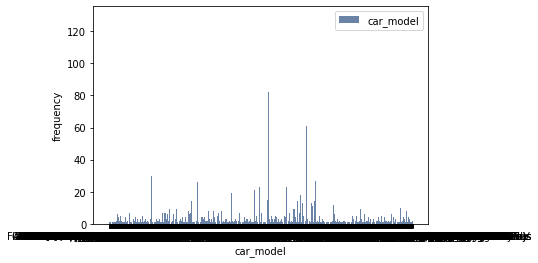

<Figure size 576x432 with 0 Axes>

In [30]:
hist1 = thinkstats2.Hist(df.name, label='car_model')
thinkplot.Hist(hist1)
thinkplot.Show(xlabel='car_model', ylabel='frequency')

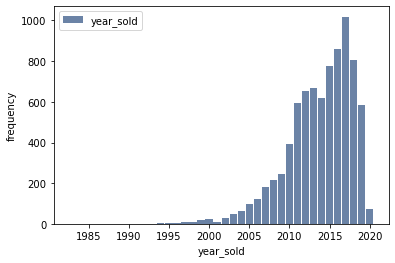

<Figure size 576x432 with 0 Axes>

In [31]:
hist2 = thinkstats2.Hist(df.year, label='year_sold')
thinkplot.Hist(hist2)
thinkplot.Show(xlabel='year_sold', ylabel='frequency')

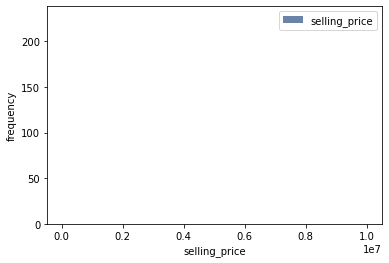

<Figure size 576x432 with 0 Axes>

In [32]:
hist3 = thinkstats2.Hist(df.selling_price, label='selling_price')
thinkplot.Hist(hist3)
thinkplot.Show(xlabel='selling_price', ylabel='frequency')

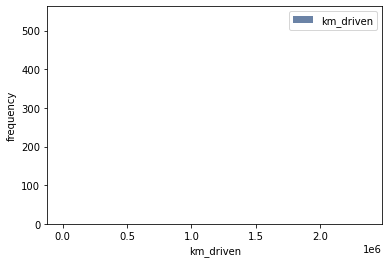

<Figure size 576x432 with 0 Axes>

In [33]:
hist4 = thinkstats2.Hist(df.km_driven, label='km_driven')
thinkplot.Hist(hist4)
thinkplot.Show(xlabel='km_driven', ylabel='frequency')

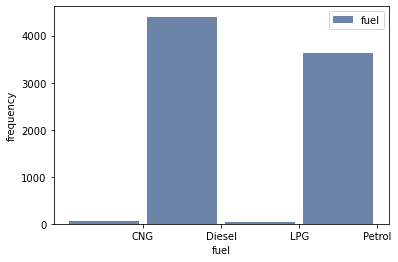

<Figure size 576x432 with 0 Axes>

In [34]:
hist5 = thinkstats2.Hist(df.fuel, label='fuel')
thinkplot.Hist(hist5)
thinkplot.Show(xlabel='fuel', ylabel='frequency')

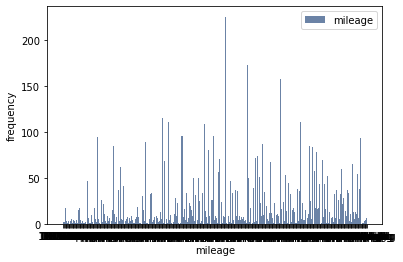

<Figure size 576x432 with 0 Axes>

In [35]:
hist6 = thinkstats2.Hist(df.mileage, label='mileage')
thinkplot.Hist(hist6)
thinkplot.Show(xlabel='mileage', ylabel='frequency')

In [36]:
# descriptive characteeristics of  year sold
mean = df.year.mean()
var = df.year.var()
mode = df.year.mode()
mean,var,mode

(2013.8040108267717,
 16.355947981671466,
 0    2017
 dtype: int64)

In [37]:
# descriptive characteeristics of  selling price
mean = df.selling_price.mean()
var = df.selling_price.var()
mode = df.selling_price.mode()
mean,var,mode

(638271.8077017716,
 650044550668.6099,
 0    300000
 dtype: int64)

In [38]:
# descriptive characteeristics of  kms driven
mean = df.km_driven.mean()
var = df.km_driven.var()
mode = df.km_driven.mode()
mean,var,mode

(69819.51082677166,
 3197965266.0825005,
 0    120000
 dtype: int64)

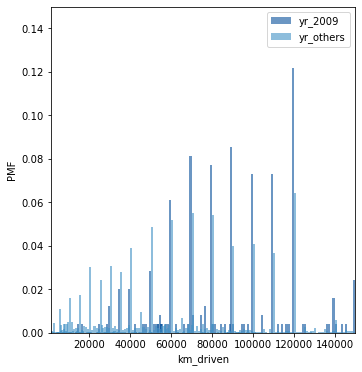

In [73]:
# kms_driven in Recessions year 2009 Vs Others

yr_2009 = df[df.year == 2009]
yr_others = df[df.year != 2009]

yr_2009_pmf = thinkstats2.Pmf(yr_2009.km_driven, label='yr_2009')
yr_others_pmf = thinkstats2.Pmf(yr_others.km_driven, label='yr_others')

width=1000
axis = [1000, 150000, 0, 0.15]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(yr_2009_pmf, align='right',width=width)
thinkplot.Hist(yr_others_pmf, align='left', width=width)
thinkplot.Config(xlabel='km_driven', ylabel='PMF', axis=axis)

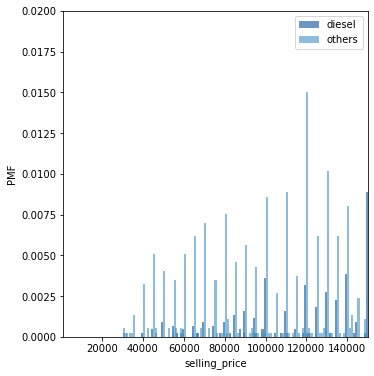

In [76]:
# selling_price of diesel Vs Other cars

diesel = df[df.fuel == 'Diesel']
others = df[df.fuel != 'Diesel']

diesel_pmf = thinkstats2.Pmf(diesel.selling_price, label='diesel')
others_pmf = thinkstats2.Pmf(others.selling_price, label='others')

width=1000
axis = [1000, 150000, 0, 0.02]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(diesel_pmf, align='right',width=width)
thinkplot.Hist(others_pmf, align='left', width=width)
thinkplot.Config(xlabel='selling_price', ylabel='PMF', axis=axis)

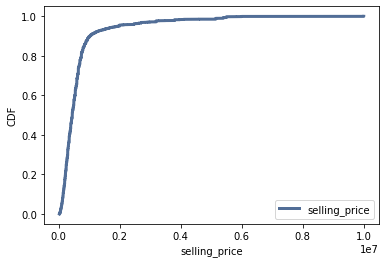

<Figure size 576x432 with 0 Axes>

In [78]:
cdf = thinkstats2.Cdf(df.selling_price, label='selling_price')
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='selling_price', ylabel='CDF')


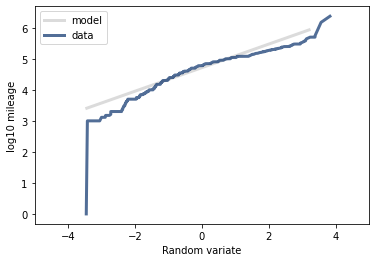

In [83]:
log_mileage = np.log10(df.km_driven)
thinkstats2.NormalProbabilityPlot(log_mileage, label='data')
thinkplot.Config(xlabel='Random variate',
                 ylabel='log10 mileage',
                 xlim=[-5, 5])

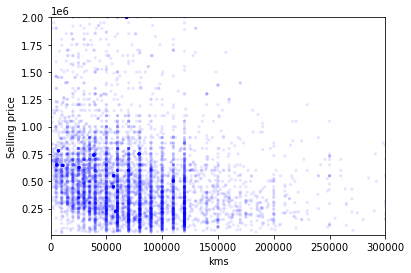

In [93]:
thinkplot.Scatter(df.km_driven, df.selling_price, alpha=0.1,s=10)
thinkplot.Config(xlabel='kms',ylabel='Selling price',axis=[0, 300000, 10000, 2000000],legend=False)

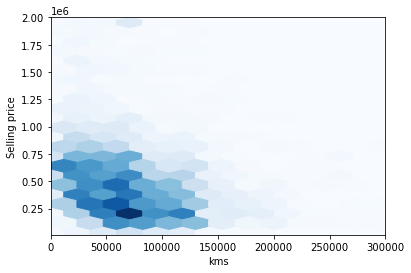

In [100]:
thinkplot.HexBin(df.km_driven, df.selling_price)
thinkplot.Config(xlabel='kms',ylabel='Selling price',axis=[0, 300000, 10000, 2000000],legend=False)

In [94]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [97]:
Cov(df.km_driven, df.selling_price)

-10281738375.770494

In [98]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [101]:
Corr(df.km_driven, df.selling_price)

-0.22553375557218944

In [102]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [103]:
data = df.km_driven, df.selling_price
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [105]:
#The reported p-value is 0, which means that in 1000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. That means that the p-value is probably smaller than  1/1000 , but it is not actually 0.

In [104]:
ht.actual, ht.MaxTestStat()

(0.22553375557218944, 0.044420326541032444)

In [106]:
import statsmodels.formula.api as smf

formula = 'km_driven ~ selling_price'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              km_driven   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     435.5
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           2.99e-94
Time:                        02:25:37   Log-Likelihood:            -1.0026e+05
No. Observations:                8128   AIC:                         2.005e+05
Df Residuals:                    8126   BIC:                         2.005e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.992e+04    779.473    102.526      0.000    7.84e+04    8.14e+04
selling_price    -0.0158      0.001    -20.868      0.000      -0.017      -0.014
==============================================================================
Omnibus:                    14352.350   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         61325643.186
Skew:                          11.992   Prob(JB):                         0.00
Kurtosis:                     427.858   Cond. No.                     1.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""